In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from datetime import datetime, date
import re
from IPython.display import display, HTML
from tabulate import tabulate

In [184]:
file_path='E:/Metro2/raw_data//'
# file_path='E:/Metro2/artifacts//'
df=pd.read_csv(file_path+'Data.csv')
df = df[df['9'] <= 220]
df = df[~(df['10'] == 'Bus')]
df = df[~(df['11'] == 'Bus')]
df = df[~(df['11'] =='Any public transport ')]

In [185]:
df['8'].unique()
trip_map={'Bus + Metro ':'Bus + Metro', 'Metro ':'Metro', 'Bus + metro + metro':'Bus + Metro', 'Metro + Bus ':'Metro + Bus',
       'Bus1 + Metro + Bus2 ':'Bus1 + Metro + Bus2', 'Bus + metro1 + metro2':'Bus + Metro', 'Railway+metro ':'Metro',
       'Metro + Metro':'Metro', 'Train + metro + bus':'Metro + Bus', 'Bus ':'Metro'}
df['8']=df['8'].map(trip_map)

In [186]:
df['10'].unique()
access_map={'Drove and parked a two-Wheeler ':'Drove and parked a two-Wheeler ', 'Walk ':'Walk ',
       'Dropped-off by friends/family members/others using two-wheeler ':'Dropped-off by others',
       'Drove and parked a car ':'Drove and parked a car ', 'Auto Rickshaw ':'Auto Rickshaw ', 'Ola/Uber car ':'Ola/Uber car ',
       'Dropped-off by friends/family members/others using car ':'Dropped-off by others',
       'Rapido/uber moto/Ola App two-wheeler ':'Rapido/Uber moto/Ola App two-wheeler ',
       'Rapido/Uber moto/Ola App two-wheeler ':'Rapido/Uber moto/Ola App two-wheeler '}
df['10']=df['10'].map(access_map)
df['11']=df['11'].map(access_map)

In [187]:
print(df['12c(a)'].value_counts(),df['12c(b)'].value_counts(),df['12c(c)'].value_counts(),df['12c(d)'].value_counts(),df['12c(e)'].value_counts())

12c(a)
Will not use for both trips (ಎರಡೂ ಪ್ರವಾಸಗಳಿಗೆ ಬಳಸಲಾಗುವುದಿಲ್ಲ)                                                                                                                    585
Will use for access trip (ಆಕ್ಸೆಸ್ ಪ್ರಯಾಣ ಬಳಸಲಾಗುವುದು)                                                                                                                             85
Will use for access trip (ಆಕ್ಸೆಸ್ ಪ್ರಯಾಣ ಬಳಸಲಾಗುವುದು), Will use for egress trip (ಎಗ್ರೆಸ್ಸ್ ಪ್ರಯಾಣ ಬಳಸಲಾಗುವುದು)                                                                    64
Will use for egress trip (ಎಗ್ರೆಸ್ಸ್ ಪ್ರಯಾಣ ಬಳಸಲಾಗುವುದು)                                                                                                                           31
Will use for access trip (ಆಕ್ಸೆಸ್ ಪ್ರಯಾಣ ಬಳಸಲಾಗುವುದು), Will not use for both trips (ಎರಡೂ ಪ್ರವಾಸಗಳಿಗೆ ಬಳಸಲಾಗುವುದಿಲ್ಲ)                                                               2
Will use for egress trip (ಎಗ್ರೆಸ್ಸ್ ಪ್ರಯಾಣ ಬಳಸಲಾಗುವುದು), Will not use for both trips (ಎರ

In [188]:
# Function to remove non-English text
def remove_non_english_text(text):
    return re.sub(r'\s*\([^)]*\)', '', text)

# Apply the function to the specified columns
for col in ['12c(a)', '12c(b)', '12c(c)', '12c(d)', '12c(e)']:
    df[col] = df[col].apply(remove_non_english_text)

In [189]:
print(df['12c(a)'].value_counts(),df['12c(b)'].value_counts(),df['12c(c)'].value_counts(),df['12c(d)'].value_counts(),df['12c(e)'].value_counts())

12c(a)
Will not use for both trips                                                        585
Will use for access trip                                                            85
Will use for access trip, Will use for egress trip                                  64
Will use for egress trip                                                            31
Will use for access trip, Will not use for both trips                                2
Will use for egress trip, Will not use for both trips                                2
Will use for access trip, Will use for egress trip, Will not use for both trips      1
Name: count, dtype: int64 12c(b)
Will not use for both trips                              490
Will use for access trip                                 110
Will use for access trip, Will use for egress trip        95
Will use for egress trip                                  69
Will use for egress trip, Will not use for both trips      4
Will use for access trip, Will not use for bot

In [190]:
bicycle_dict={
 'Will use for access trip, Will use for egress trip':'Will use for both trips',
 'Will use for access trip, Will use for egress trip, Will not use for both trips':'all 3 selected',
 'Will use for access trip, Will not use for both trips':'selected 1 and 3',
 'Will use for egress trip, Will not use for both trips':'selected 2 and 3',
 'Will use for egress trip':'Will use for egress trip',
 'Will not use for both trips':'Will not use for both trips',
 'Will use for access trip':'Will use for access trip'
 }

df['12c(a)']=df['12c(a)'].map(bicycle_dict)
df['12c(b)']=df['12c(b)'].map(bicycle_dict)
df['12c(c)']=df['12c(c)'].map(bicycle_dict)
df['12c(d)']=df['12c(d)'].map(bicycle_dict)
df['12c(e)']=df['12c(e)'].map(bicycle_dict)

In [191]:
print(df['12c(a)'].unique(),df['12c(b)'].unique(),df['12c(c)'].unique(),df['12c(d)'].unique(),df['12c(e)'].unique())

['Will not use for both trips' 'Will use for access trip'
 'Will use for both trips' 'Will use for egress trip' 'all 3 selected'
 'selected 1 and 3' 'selected 2 and 3'] ['Will not use for both trips' 'Will use for access trip'
 'Will use for both trips' 'Will use for egress trip' 'selected 2 and 3'
 'selected 1 and 3'] ['Will not use for both trips' 'Will use for access trip'
 'Will use for both trips' 'Will use for egress trip' 'selected 2 and 3'] ['Will not use for both trips' 'Will use for access trip'
 'Will use for egress trip' 'Will use for both trips' 'selected 2 and 3'] ['Will not use for both trips' 'Will use for access trip'
 'Will use for egress trip' 'Will use for both trips' 'selected 2 and 3'
 'selected 1 and 3']


In [192]:
for column in df.select_dtypes(include='object').columns:
    # if re.match(r'^12c\([a-e]\)$', column):
    #     df[column] = df[column].apply(lambda x: 'Will use for both trips' if ',' in x else x)
    df[column] = df[column].str.replace(r'\(.*\)', '', regex=True)



In [193]:
display(HTML(f"<h2>No of samples is {df.shape[0]}</h0>"))

In [194]:
print(df['12c(a)'].value_counts(),df['12c(b)'].value_counts(),df['12c(c)'].value_counts(),df['12c(d)'].value_counts(),df['12c(e)'].value_counts())

12c(a)
Will not use for both trips    585
Will use for access trip        85
Will use for both trips         64
Will use for egress trip        31
selected 1 and 3                 2
selected 2 and 3                 2
all 3 selected                   1
Name: count, dtype: int64 12c(b)
Will not use for both trips    490
Will use for access trip       110
Will use for both trips         95
Will use for egress trip        69
selected 2 and 3                 4
selected 1 and 3                 2
Name: count, dtype: int64 12c(c)
Will not use for both trips    546
Will use for access trip        86
Will use for both trips         68
Will use for egress trip        68
selected 2 and 3                 2
Name: count, dtype: int64 12c(d)
Will not use for both trips    505
Will use for both trips        126
Will use for access trip        80
Will use for egress trip        57
selected 2 and 3                 2
Name: count, dtype: int64 12c(e)
Will not use for both trips    556
Will use for both tri

In [195]:
# display the column 1 for the entries of 12c(a) to 12c(e) where they are 'all 3 selected'
#  'selected 1 and 3' 'selected 2 and 3'

for column in df.select_dtypes(include='object').columns:
    if re.match(r'^12c\([a-e]\)$', column):
        # remove such entries
        df = df[~df[column].isin(['all 3 selected', 'selected 1 and 3', 'selected 2 and 3'])]
        # print(df.loc[df[column].isin(['all 3 selected', 'selected 1 and 3', 'selected 2 and 3']), [column,'1', 'Timestamp']]) 

In [196]:
print(df['12c(a)'].value_counts(),df['12c(b)'].value_counts(),df['12c(c)'].value_counts(),df['12c(d)'].value_counts(),df['12c(e)'].value_counts())

12c(a)
Will not use for both trips    578
Will use for access trip        83
Will use for both trips         64
Will use for egress trip        30
Name: count, dtype: int64 12c(b)
Will not use for both trips    484
Will use for access trip       108
Will use for both trips         95
Will use for egress trip        68
Name: count, dtype: int64 12c(c)
Will not use for both trips    539
Will use for access trip        84
Will use for both trips         67
Will use for egress trip        65
Name: count, dtype: int64 12c(d)
Will not use for both trips    500
Will use for both trips        124
Will use for access trip        76
Will use for egress trip        55
Name: count, dtype: int64 12c(e)
Will not use for both trips    549
Will use for both trips        103
Will use for egress trip        57
Will use for access trip        46
Name: count, dtype: int64


In [197]:
df['12c(a)'].unique()
[ 'Will use for access trip','Will use for egress trip', 'Will use for both trips','Will not use for both trips']

['Will use for access trip',
 'Will use for egress trip',
 'Will use for both trips',
 'Will not use for both trips']

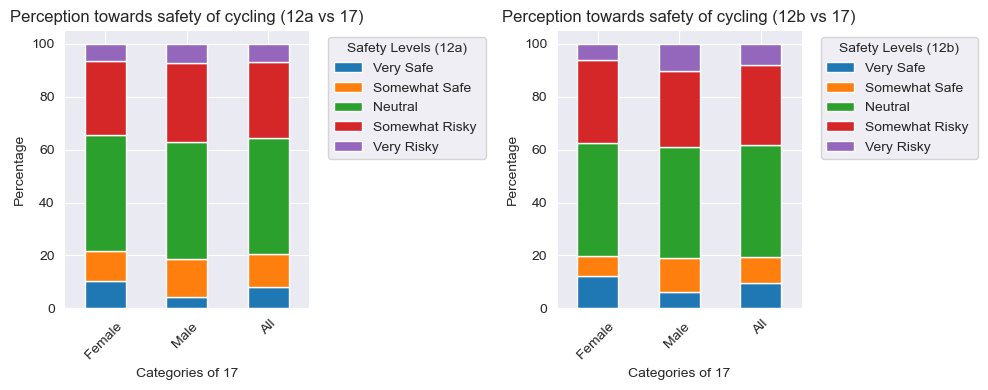

In [198]:
# Define the desired order of the '12a' and '12b' labels
desired_order_12 = ['Very Safe ', 'Somewhat Safe ', 'Neutral ', 'Somewhat Risky ', 'Very Risky ']

# Generate crosstabulation for 12a
crosstab_12a = pd.crosstab(df['17'], df['12a'], margins=True, normalize='index') * 100
crosstab_12a = np.round(crosstab_12a, decimals=2)

# Reindex the crosstab to match the desired order
crosstab_12a = crosstab_12a.reindex(columns=desired_order_12, fill_value=0)

# Generate crosstabulation for 12b
crosstab_12b = pd.crosstab(df['17'], df['12b'], margins=True, normalize='index') * 100
crosstab_12b = np.round(crosstab_12b, decimals=2)

# Reindex the crosstab to match the desired order
crosstab_12b = crosstab_12b.reindex(columns=desired_order_12, fill_value=0)

# Create a 1x2 grid of subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Plot the first crosstabulation (12a vs 17)
crosstab_12a.plot(kind='bar', stacked=True, width=bar_width, ax=axes[0])
axes[0].set_xlabel('Categories of 17')
axes[0].set_ylabel('Percentage')
axes[0].set_title('Perception towards safety of cycling (12a vs 17)')
axes[0].legend(title='Safety Levels (12a)', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)

# Plot the second crosstabulation (12b vs 17)
crosstab_12b.plot(kind='bar', stacked=True, width=bar_width, ax=axes[1])
axes[1].set_xlabel('Categories of 17')
axes[1].set_ylabel('Percentage')
axes[1].set_title('Perception towards safety of cycling (12b vs 17)')
axes[1].legend(title='Safety Levels (12b)', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)

# Adjust layout and show plot
plt.tight_layout()
plt.show()

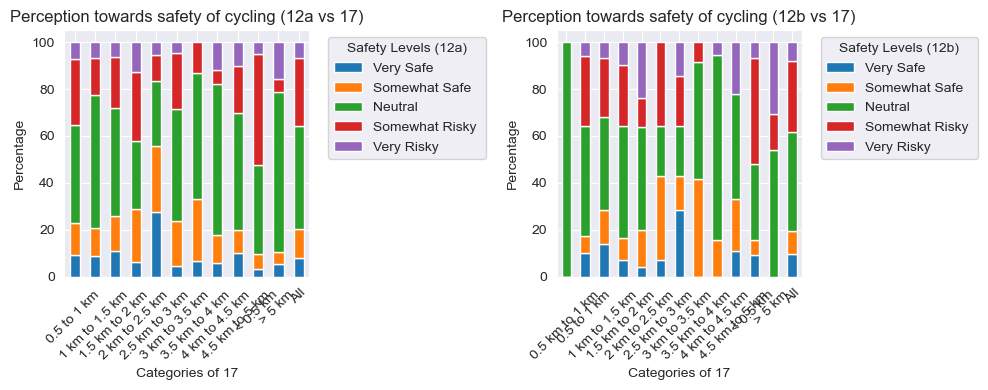

In [199]:
# Define the desired order of the '12a' and '12b' labels
desired_order_12 = ['Very Safe ', 'Somewhat Safe ', 'Neutral ', 'Somewhat Risky ', 'Very Risky ']

# Generate crosstabulation for 12a
crosstab_12a = pd.crosstab(df['10b'], df['12a'], margins=True, normalize='index') * 100
crosstab_12a = np.round(crosstab_12a, decimals=2)

# Reindex the crosstab to match the desired order
crosstab_12a = crosstab_12a.reindex(columns=desired_order_12, fill_value=0)

# Generate crosstabulation for 12b
crosstab_12b = pd.crosstab(df['11b'], df['12b'], margins=True, normalize='index') * 100
crosstab_12b = np.round(crosstab_12b, decimals=2)

# Reindex the crosstab to match the desired order
crosstab_12b = crosstab_12b.reindex(columns=desired_order_12, fill_value=0)

# Create a 1x2 grid of subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Plot the first crosstabulation (12a vs 17)
crosstab_12a.plot(kind='bar', stacked=True, width=bar_width, ax=axes[0])
axes[0].set_xlabel('Categories of 17')
axes[0].set_ylabel('Percentage')
axes[0].set_title('Perception towards safety of cycling (12a vs 17)')
axes[0].legend(title='Safety Levels (12a)', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)

# Plot the second crosstabulation (12b vs 17)
crosstab_12b.plot(kind='bar', stacked=True, width=bar_width, ax=axes[1])
axes[1].set_xlabel('Categories of 17')
axes[1].set_ylabel('Percentage')
axes[1].set_title('Perception towards safety of cycling (12b vs 17)')
axes[1].legend(title='Safety Levels (12b)', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)

# Adjust layout and show plot
plt.tight_layout()
plt.show()

In [200]:
age_mapper={'36-45 yrs ':40, '26-35 yrs ':30, '18-25 yrs ':21, '46-60 yrs ':52,
       '> 60 yrs ':65}
df['18']=df['18'].map(age_mapper)

In [201]:
df['17'].unique()

array(['Male ', 'Female '], dtype=object)

In [202]:
desired_order_12 = ['Very Safe ', 'Somewhat Safe ', 'Neutral ', 'Somewhat Risky ', 'Very Risky ']

# Calculate the average of column '18' for each unique value of '12a' and reindex to match the desired order
df1=df[df['17']=='Male ']
mean_12a = df1.groupby('12a')['18'].mean().reindex(desired_order_12)
print("Average value of column 18 for each unique value of column 12a:")
print(mean_12a)

# Calculate the average of column '18' for each unique value of '12b' and reindex to match the desired order
mean_12b = df1.groupby('12b')['18'].mean().reindex(desired_order_12)
print("\nAverage value of column 18 for each unique value of column 12b:")
print(mean_12b)


df1=df[df['17']=='Female ']
mean_12a = df1.groupby('12a')['18'].mean().reindex(desired_order_12)
print("Average value of column 18 for each unique value of column 12a:")
print(mean_12a)

# Calculate the average of column '18' for each unique value of '12b' and reindex to match the desired order
mean_12b = df1.groupby('12b')['18'].mean().reindex(desired_order_12)
print("\nAverage value of column 18 for each unique value of column 12b:")
print(mean_12b)

Average value of column 18 for each unique value of column 12a:
12a
Very Safe          28.928571
Somewhat Safe      31.800000
Neutral            31.400000
Somewhat Risky     31.431579
Very Risky         35.217391
Name: 18, dtype: float64

Average value of column 18 for each unique value of column 12b:
12b
Very Safe          29.700000
Somewhat Safe      28.775000
Neutral            32.218045
Somewhat Risky     31.252747
Very Risky         34.969697
Name: 18, dtype: float64
Average value of column 18 for each unique value of column 12a:
12a
Very Safe          34.217391
Somewhat Safe      33.061224
Neutral            31.937500
Somewhat Risky     33.622951
Very Risky         36.758621
Name: 18, dtype: float64

Average value of column 18 for each unique value of column 12b:
12b
Very Safe          35.584906
Somewhat Safe      33.764706
Neutral            31.368984
Somewhat Risky     33.467153
Very Risky         37.370370
Name: 18, dtype: float64


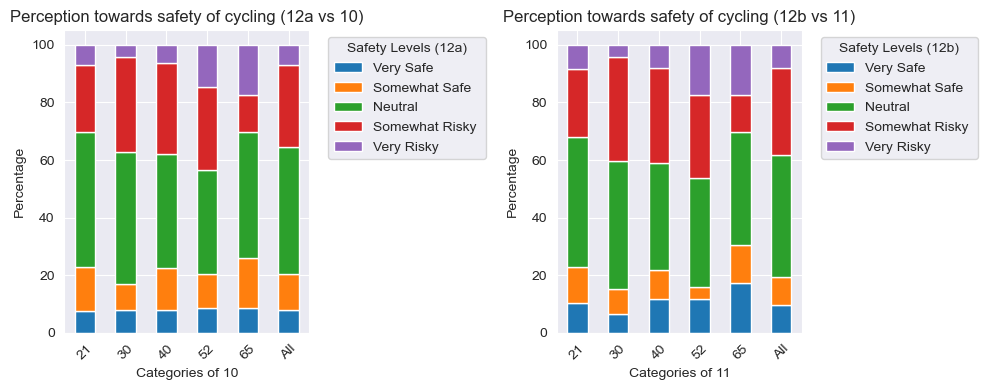

In [203]:
# Define the desired order of the '12a' and '12b' labels
desired_order_12 = ['Very Safe ', 'Somewhat Safe ', 'Neutral ', 'Somewhat Risky ', 'Very Risky ']

# Generate crosstabulation for 12a
crosstab_12a = pd.crosstab(df['18'], df['12a'], margins=True, normalize='index') * 100
crosstab_12a = np.round(crosstab_12a, decimals=2)

# Reindex the crosstab to match the desired order
crosstab_12a = crosstab_12a.reindex(columns=desired_order_12, fill_value=0)

# Generate crosstabulation for 12b
crosstab_12b = pd.crosstab(df['18'], df['12b'], margins=True, normalize='index') * 100
crosstab_12b = np.round(crosstab_12b, decimals=2)

# Reindex the crosstab to match the desired order
crosstab_12b = crosstab_12b.reindex(columns=desired_order_12, fill_value=0)

# Create a 1x2 grid of subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))


# Plot the first crosstabulation (12a vs 10)
crosstab_12a.plot(kind='bar', stacked=True, width=0.5, ax=axes[0])
axes[0].set_xlabel('Categories of 10')
axes[0].set_ylabel('Percentage')
axes[0].set_title('Perception towards safety of cycling (12a vs 10)')
axes[0].legend(title='Safety Levels (12a)', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)

# Plot the second crosstabulation (12b vs 11)
crosstab_12b.plot(kind='bar', stacked=True, width=0.5, ax=axes[1])
axes[1].set_xlabel('Categories of 11')
axes[1].set_ylabel('Percentage')
axes[1].set_title('Perception towards safety of cycling (12b vs 11)')
axes[1].legend(title='Safety Levels (12b)', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)

# Adjust layout and show plot
plt.tight_layout()
plt.show()

In [204]:
desired_order_12 = ['Very Safe ', 'Somewhat Safe ', 'Neutral ', 'Somewhat Risky ', 'Very Risky ']

# Generate crosstabulation for 12a
crosstab_12a = pd.crosstab(df['8'], df['12a'], margins=True, normalize='index') * 100
crosstab_12a = np.round(crosstab_12a, decimals=2)

# Reindex the crosstab to match the desired order
crosstab_12a = crosstab_12a.reindex(columns=desired_order_12, fill_value=0)

print(crosstab_12a)

12a          Very Safe   Somewhat Safe   Neutral   Somewhat Risky   \
8                                                                    
Bus + Metro           0           100.0       0.0                0   
Metro                 0             0.0     100.0                0   
All                   0            50.0      50.0                0   

12a          Very Risky   
8                         
Bus + Metro            0  
Metro                  0  
All                    0  


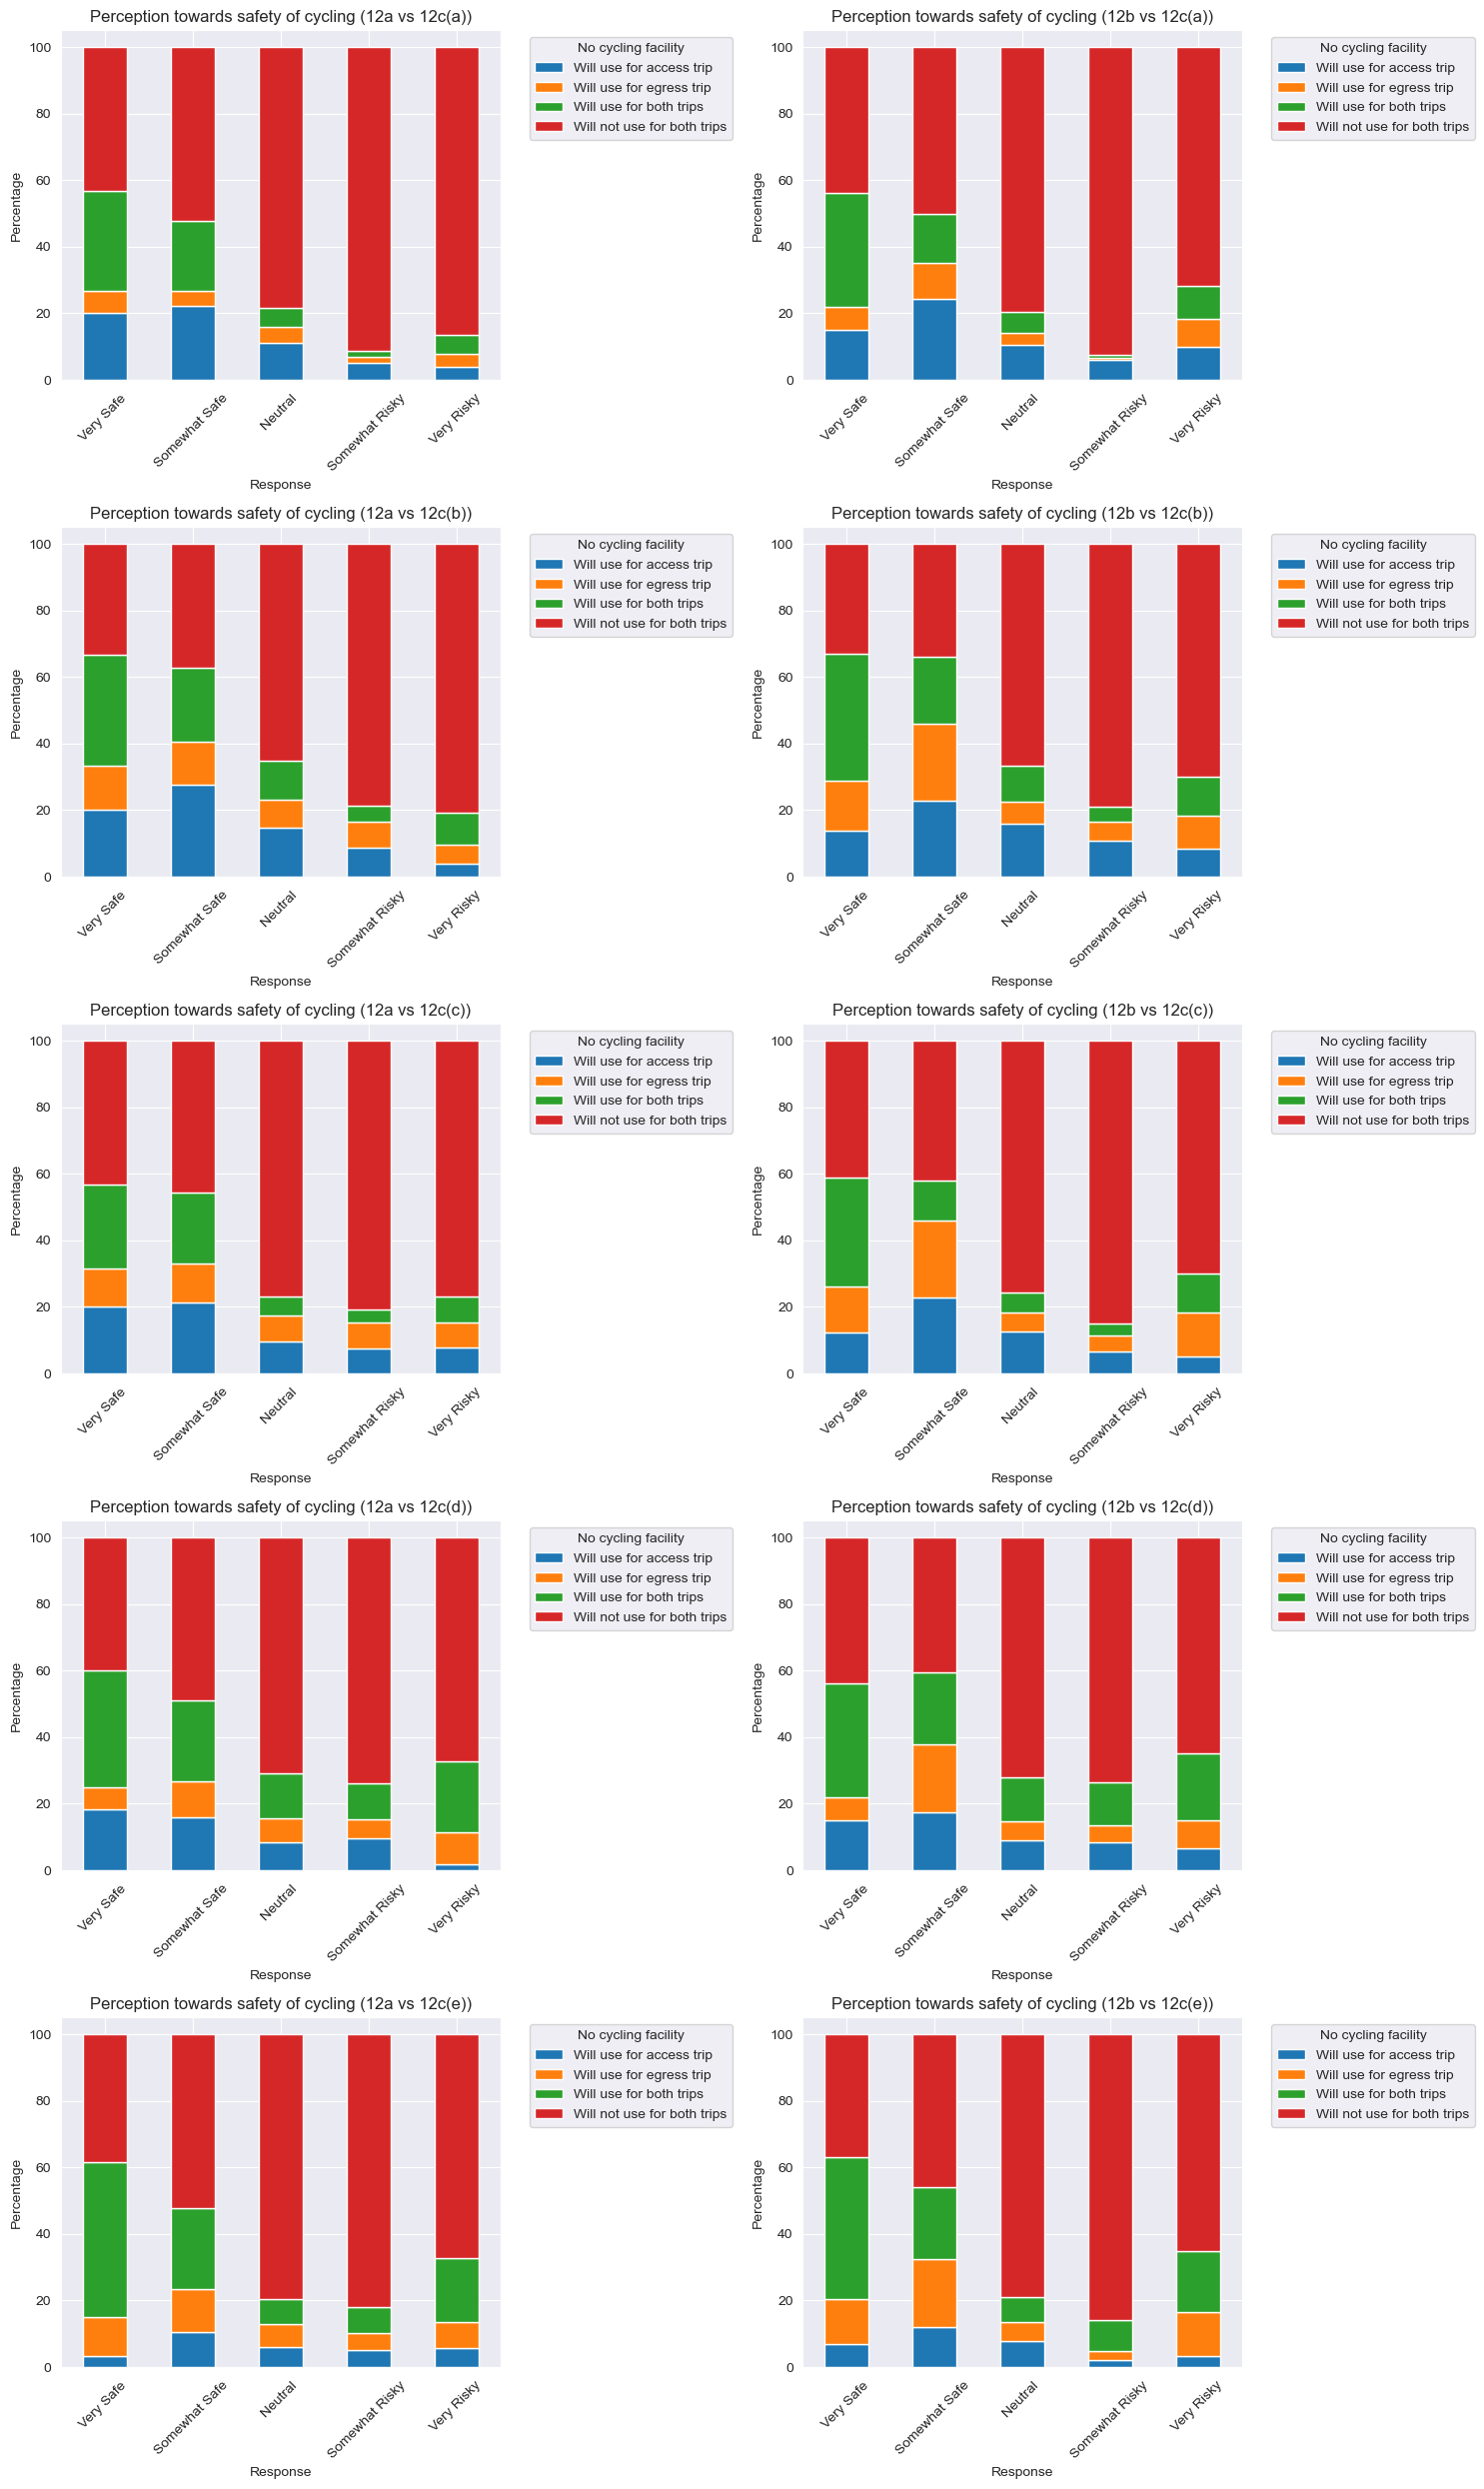

In [205]:
# Define the desired order of the x labels
desired_order = ['Very Safe ', 'Somewhat Safe ', 'Neutral ', 'Somewhat Risky ', 'Very Risky ']

# Define the desired order of the legend labels
legend_order = ['Will use for access trip', 'Will use for egress trip', 'Will use for both trips', 'Will not use for both trips']

# Create a 5x2 grid of subplots
fig, axes = plt.subplots(5, 2, figsize=(15, 25))

# Iterate over each subplot to generate the required plots
x_vars = ['12a', '12b']
y_vars = ['12c(a)', '12c(b)', '12c(c)', '12c(d)', '12c(e)']

for i, x_var in enumerate(x_vars):
    for j, y_var in enumerate(y_vars):
        ax = axes[j, i]
        
        # Generate crosstabulation
        crosstab = pd.crosstab(df[x_var], df[y_var], margins=True, normalize='index') * 100
        crosstab = np.round(crosstab, decimals=2)

        # Reindex the crosstab to match the desired order of x labels
        crosstab = crosstab.reindex(desired_order, fill_value=0)

        # Reorder the columns to match the desired legend order
        crosstab = crosstab[legend_order]

        # Plotting crosstabulation
        bar_width = 0.5
        crosstab.plot(kind='bar', stacked=True, width=bar_width, ax=ax)
        
        # Set plot labels and title
        ax.set_xlabel('Response')
        ax.set_ylabel('Percentage')
        ax.set_title(f"Perception towards safety of cycling ({x_var} vs {y_var})")
        ax.legend(title='No cycling facility', bbox_to_anchor=(1.05, 1), loc='upper left')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Adjust layout and show plot
plt.tight_layout()
plt.show()